In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\visha\.cache\kagglehub\datasets\crowdflower\twitter-airline-sentiment\versions\4


In [7]:
df = pd.read_csv(path + "/tweets.csv")
print(df.head())
df.shape

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

(14640, 15)

In [8]:
print(df['airline_sentiment'].value_counts())

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


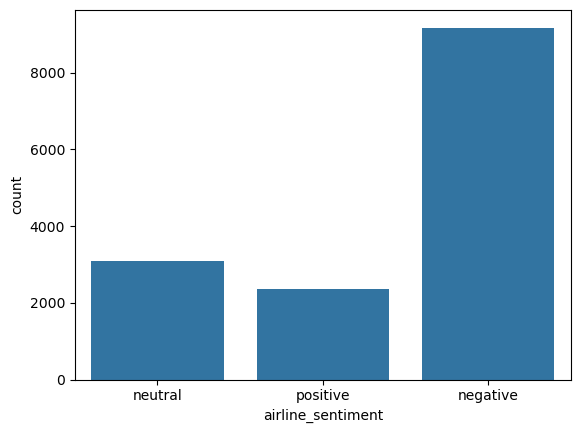

In [9]:
sns.countplot(data=df, x='airline_sentiment')
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in text.split() if word not in stop])
    return text

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
X = df['clean_text']
y = df['airline_sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1889
     neutral       0.67      0.46      0.54       580
    positive       0.83      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.67      0.71      2928
weighted avg       0.79      0.80      0.78      2928



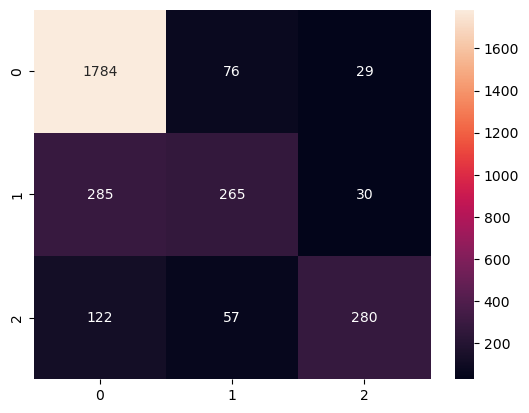

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


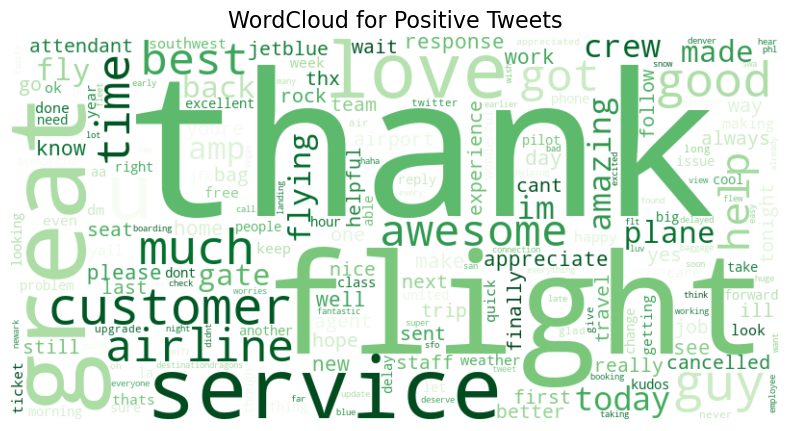

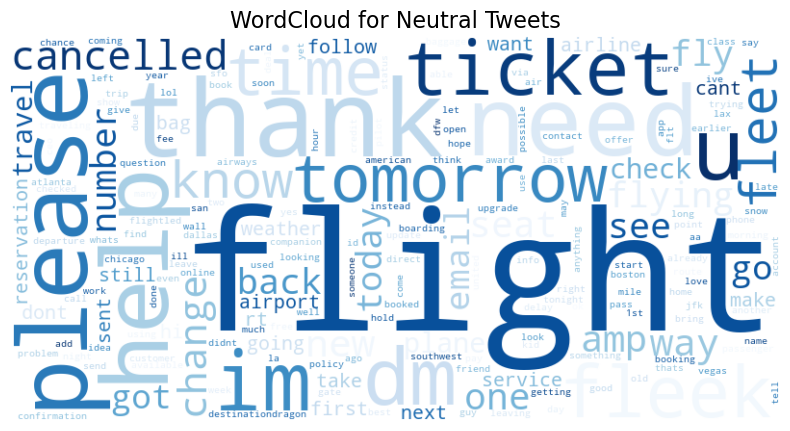

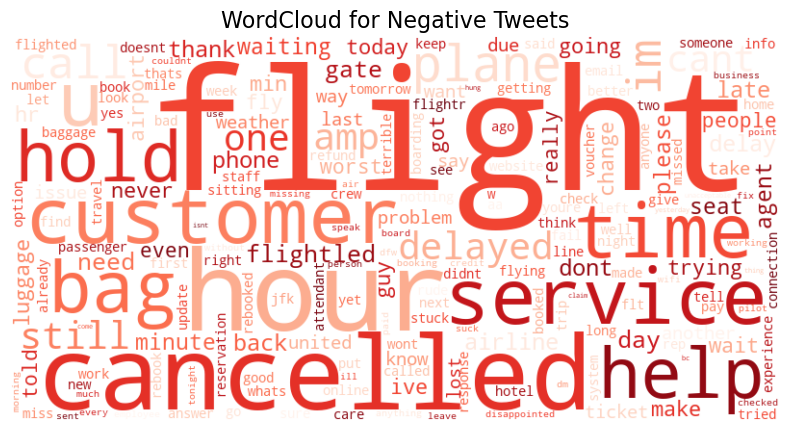

In [16]:
# 📚 Install if not already installed
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a wordcloud for a given sentiment
def plot_wordcloud(sentiment_label, color):
    text = " ".join(df[df['airline_sentiment'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap=color,
                          max_words=200,
                          collocations=False).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment_label.capitalize()} Tweets", fontsize=16)
    plt.show()

# Generate WordClouds for each sentiment
plot_wordcloud('positive', 'Greens')
plot_wordcloud('neutral', 'Blues')
plot_wordcloud('negative', 'Reds')
